<a href="https://colab.research.google.com/github/monteroanibal/diplomado_GEOIA_IGAC2025/blob/main/Interm_Modulo_17_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook de la sesión

---

Se configura una semilla para replicar el ejercicio.

In [ ]:
semilla = 24680

# 1. Cargue de librerías

Para manipular objetos y métodos de Numpy.

In [ ]:
import numpy as np

Para importar los ráster (rasterio). la función show permite graficar los ráster de una forma básica.

In [ ]:
%%capture
!pip install rasterio

import rasterio as rs
from rasterio.plot import show

Para partir el conjunto de datos entre los subconjuntos de datos entrenamiento, validación y prueba.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

Para hacer los gráficos de barras y de dispersión.

In [ ]:
import matplotlib.pyplot as plt

Para utilizar la implementación de los algoritmos de _Machine Learning_ que se comparan desde su desempeño durante su entrenamiento con el caso de estudio.

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Para realizar la búsqueda en rejilla.

In [ ]:
from sklearn.model_selection import GridSearchCV

Para calcular las métricas de desempeño predictivo.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Para medir el tiempo que toma ejecutar las partes del código.

In [ ]:
from time import time

# 2. Lectura y primera exploración de datos ráster



*Primero*, se almacenan los nombres de las capas en una lista, tal y como se encuentran los nombres de los archivos, sin incluir la extensión .tif.

In [ ]:
capas = ['po_2018','B4_2018','B3_2018','B2_2018','B8_2018']

Se cargan las capas de forma iterativa al leer la lista de los nombres de los archivos. Las capas en .tif quedan cargadas en la sesión con el respectivo nombre del archivo.

Debido a que las diferentes bandas de sentinel (B4, B3, B2) se encuentran en un mismo .tif, estas no se incluyen en la iteración y se importa cada banda de forma individual, modificando el índice del objeto que se encuentra al final de la línea de importación ([0], [1], [2], [3]).

In [ ]:
%%capture
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Interm_Modulo_17_Datos/Interm_Modulo_17_Sentinel2_MSI_Level2A_2018_76147_re.tif
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Interm_Modulo_17_Datos/Interm_Modulo_17_Sentinel2_MSI_Level2A_2023_76147_re.tif
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Interm_Modulo_17_Datos/Interm_Modulo_17_Pobl_CNPV2018_76147_re.tif

In [ ]:
poblacion2018 = rs.open('/content/Interm_Modulo_17_Pobl_CNPV2018_76147_re.tif')
sentinel_2018 = rs.open('/content/Interm_Modulo_17_Sentinel2_MSI_Level2A_2018_76147_re.tif')
sentinel_2023 = rs.open('/content/Interm_Modulo_17_Sentinel2_MSI_Level2A_2023_76147_re.tif')

po_2018 = poblacion2018.read()[0]
B4_2018 = sentinel_2018.read()[0]
B3_2018 = sentinel_2018.read()[1]
B2_2018 = sentinel_2018.read()[2]
B8_2018 = sentinel_2018.read()[3]

Se verifica que los ráster estén el el mismo sistema de coordenadas de referencia.

In [ ]:
print( poblacion2018.crs )
print( sentinel_2018.crs )
print( sentinel_2023.crs )

EPSG:4326
EPSG:4326
EPSG:4326


Se verifica que se importaron los archivos bien, sumando los valores de los arrays de las capas.

Se utiliza la funcion locals() de manera análoga a la función globals(), esta vez, para invocar una variable a partir de una cadena de caracteres que lleva su nombre.

In [ ]:
for nom in capas:
  print( nom + ':' )
  print( np.nansum(locals()[ nom ]) )
  print( ' ' )

po_2018:
118803.0
 
B4_2018:
114340656.87022266
 
B3_2018:
146734881.81885502
 
B2_2018:
93595900.74200206
 
B8_2018:
611716036.0906174
 


Se grafican los rásters importados, con la función show().

po_2018:


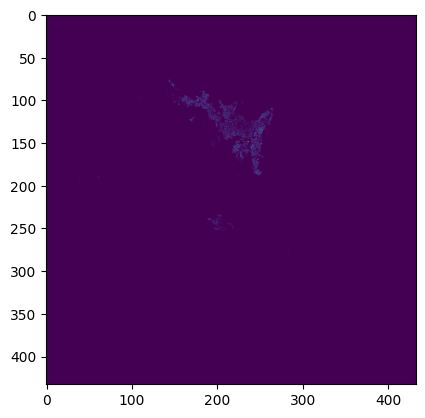

Axes(0.22375,0.11;0.5775x0.77)
 
B4_2018:


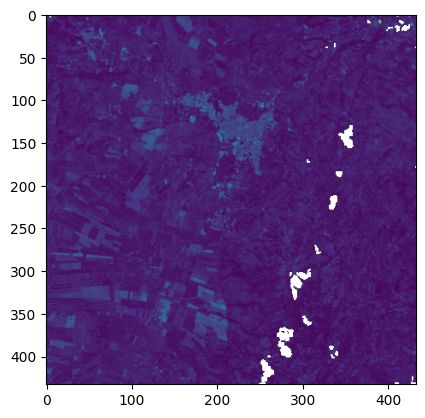

Axes(0.22375,0.11;0.5775x0.77)
 
B3_2018:


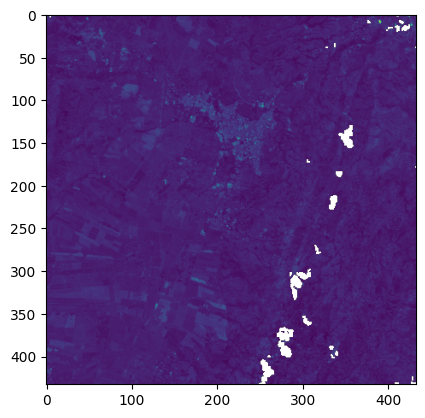

Axes(0.22375,0.11;0.5775x0.77)
 
B2_2018:


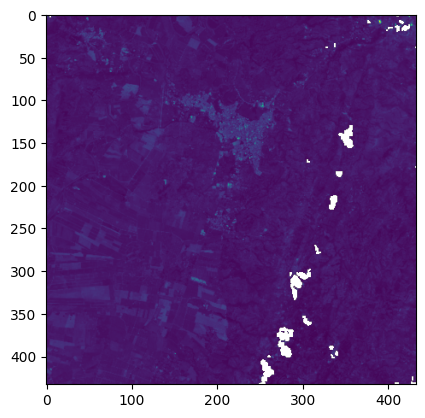

Axes(0.22375,0.11;0.5775x0.77)
 
B8_2018:


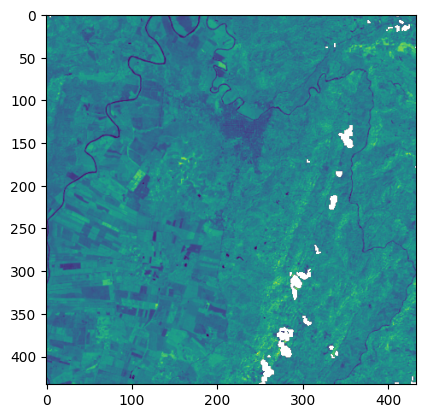

Axes(0.22375,0.11;0.5775x0.77)
 


In [ ]:
for nom in capas:
  print( nom + ':' )
  print( show(locals()[ nom ]) )
  print( ' ' )

Se imprimen los valores máximo y mínimo de las capas originales en los ráster, solo para chequearlos.

In [ ]:
for nom in capas:
  print( nom + ' mínimo:' )
  print( np.nanmin(locals()[ nom ]) )
  print( nom + ' máximo:' )
  print( np.nanmax(locals()[ nom ]) )
  print( ' ' )

po_2018 mínimo:
0.0
po_2018 máximo:
547.0
 
B4_2018 mínimo:
99.82538055483025
B4_2018 máximo:
6166.43096411196
 
B3_2018 mínimo:
247.5844848736963
B3_2018 máximo:
6383.255160537768
 
B2_2018 mínimo:
137.25782058738014
B2_2018 máximo:
5883.218192362004
 
B8_2018 mínimo:
140.1430392079939
B8_2018 máximo:
7326.118224636568
 


Se imprimen las dimensiones de las capas (Deben ser iguales todas), solo para chequearlas.

In [ ]:
for nom in capas:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

po_2018:
(433, 433)
 
B4_2018:
(433, 433)
 
B3_2018:
(433, 433)
 
B2_2018:
(433, 433)
 
B8_2018:
(433, 433)
 


Se chequean en orden los valores que toma la capa de población, donde se observan los valores más altos luego de ser organizados.

In [ ]:
vals_po = po_2018.flatten().tolist()
vals_po.sort(reverse=True)
print(vals_po[:20])
del vals_po

[547.0, 284.0, 200.0, 193.0, 171.0, 170.0, 168.0, 160.0, 155.0, 149.0, 149.0, 147.0, 145.0, 142.0, 142.0, 141.0, 140.0, 136.0, 135.0, 131.0]


# 3. Cruzar datos **sin dependencia local**


Se ponen uno sobre otro los arrays de las capas de información.

In [ ]:
nrmlzd = np.stack([B4_2018, B3_2018, B2_2018, B8_2018], axis=0)

Primero se verifican el tamaño en pixeles del ráster.

In [ ]:
nrmlzd.shape

(5, 433, 433)

In [ ]:
num_cap = nrmlzd.shape[0]
num_fil = nrmlzd.shape[1]
num_col = nrmlzd.shape[2]

Se gira la matriz de valores del ráster con el método _swapaxes_ de numpy.

In [ ]:
tabla_datos = np.swapaxes(nrmlzd, axis1=0, axis2=2)

In [ ]:
tabla_datos.shape

(433, 433, 5)

Se apilan las observaciones por unidad de observación, o sea por píxel.

In [ ]:
tabla_datos = pd.DataFrame( tabla_datos.reshape(num_col*num_fil,num_cap) )
tabla_datos = tabla_datos.rename(columns=dict( zip(range(5) , ['po','B4','B3','B2','B8'] )))
tabla_datos

,po,B4,B3,B2,B8
0,0.0,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN
2,0.0,583.790765,924.587102,712.485081,3708.261036
3,0.0,1082.586257,1220.555477,949.077964,3544.589481
4,0.0,656.402613,933.308210,662.197075,4068.722789
...,...,...,...,...,...
187484,0.0,534.880571,880.455419,557.852911,4182.457669
187485,0.0,579.157011,956.845318,575.672030,4629.188710
187486,0.0,404.298881,710.790434,428.673400,3800.754725
187487,0.0,NaN,NaN,NaN,NaN


Se eliminan las filas que tengan algún NaN, conservando el índice para reconstruir el ráster de salida.

In [ ]:
num_unids_orig = len(tabla_datos)
print(num_unids_orig)

187489


In [ ]:
tabla_datos_nonan = tabla_datos.dropna()
num_unids_sin_nan = len(tabla_datos_nonan)

In [ ]:
print(num_unids_orig - num_unids_sin_nan)

1856


# 5. Partición del conjunto de datos entre entrenamiento y prueba

Se observa que con ayuda de uno de los métodos de scikit-learn se separan aleatoriamente entre conjuntos de entrenamiento y prueba, conservando la asociación de los valores de los covariados, que en este caso son la radiación resumida en cada unidad de observación desde cada banda del sensor remoto, y la población de la misma unidad de obaservación.

Se debe mencionar que para comparar el desempeño de los diferentes algoritmos y sus diferentes configuraciones de hiperparámetros, el conjunto que acá se describe como _train_ tiene la funciòn de entrenamiento y a la vez de lo que se le da el nombre de validación al momento de encontrar el mejor modelo posible a partir de la búsqueda por rejilla y previo a el cálculo de métricas o estadísticas de prueba.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tabla_datos_nonan[['B4','B3','B2','B8']], tabla_datos_nonan[['po']], test_size=0.01, random_state=semilla)

# 6. Balanceo de datos: una alternativa

La distribución espacial de la población tiene la condición particular de que altos volúmenes de esta se concentran en àreas muy reducidas en comparación con el àrea que abarca una delimitación político administrativa.

Al calcular el número de unidades que contienen población, es menos de una centésima fracción de aquellas que no tienen población. Esto significa un reto para un algoritmo de regresión, ya que si se suministran estos datos crudos al algoritmo, este inevitablemente se sobreajustará a los casos sin población.

In [ ]:
print((y_train > 0).sum().to_numpy()[0])

4110


In [ ]:
print((y_train == 0).sum().to_numpy()[0])

179666


Obsérvese la escala del eye _y_ y compárese la distribución de las unidades de obsevación por número de habitantes, antes y después de la disminución de datos.

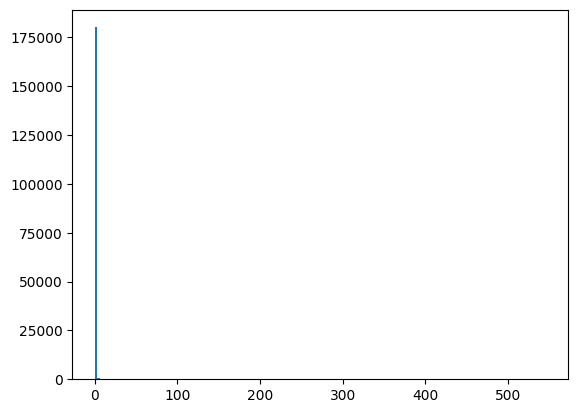

In [ ]:
plt.hist( y_train.astype(int), bins=range(0, y_train.astype(int).max().to_numpy()[0],3))
plt.show()

Se configura un número de unidades de observación tomadas aleatoriamente sin población basado en la cantidad de unidades de observación que tienen un solo habitante, de forma que se hace lo que se denomina una _disminución de datos_.

In [ ]:
unids_sin_pobl = ((y_train['po']==1).sum()*2).astype(int)

In [ ]:
y_train_cero = y_train[y_train['po'] == 0].sample(n=unids_sin_pobl).sort_index()
y_train_rest = y_train[y_train['po'] > 0]

X_train_cero = X_train.loc[y_train_cero.index]
X_train_rest = X_train.loc[y_train_rest.index]

y_train_bal = pd.concat([y_train_cero, y_train_rest])
X_train_bal = pd.concat([X_train_cero, X_train_rest])

del y_train_cero, y_train_rest, X_train_cero, X_train_rest

Obsérvese la escala del eye _y_ y compárese la distribución de las unidades de obsevación por número de habitantes, antes y después de la disminución de datos.

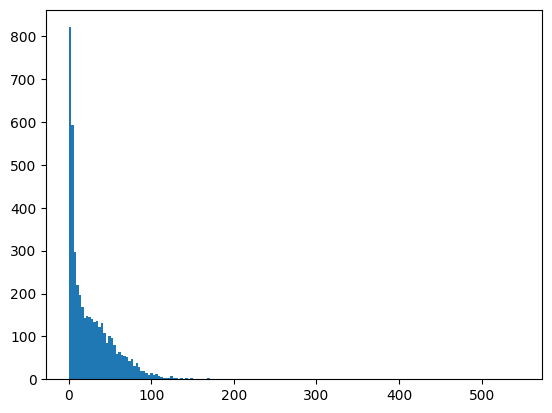

In [ ]:
plt.hist( y_train_bal.astype(int), bins=range(0, y_train.astype(int).max().to_numpy()[0],3))
plt.show()

# 7. _Grid Search_

La siguiente sintaxis hace que se haga un entrenamiento de diferentes modelos y a su vez diferentes configuraciones partir de la combinación de un conjunto de hiperparámetros.

Incluso esta sintaxis permite el entrenamiento a partir de diferentes trasformaciones de datos previas al este, así como diferentes tipos de balanceo de datos.

A su vez, a cada modelo ajustado se le calcula una métrica de puntaje de desempeño predictivo generada por Validación Cruzada, con la cual finalmente establece el mejor algoritmo y la mejor combinación de sus hiperparámetros. Generalmente se le llama Función de Pérdida.

In [ ]:
PL = Pipeline([
  ('rgr', LinearRegression())
])

grid = [

  {
    'rgr': [
      RandomForestRegressor(random_state=semilla)
    ],
    'rgr__n_estimators': [10, 50, 100, 200],
    'rgr__max_depth': [None, 5, 10, 15],
    'rgr__min_samples_split': np.linspace(0.1, 1, 11),
    'rgr__bootstrap': [True, False]
  },

  {
    'rgr': [
      SVR()
    ],
    'rgr__C':[1,10,100],
    'rgr__kernel':['rbf','poly','sigmoid']
  }

]

Se ejecuta la búsqueda por rejilla, en donde se estableción R cuadrado como la métrica de validación y comparación entre los diferentes modelos evaluados durante el algoritmo de búsqueda.

Este paso por supuesto tarda.

In [ ]:
gridsearch = GridSearchCV(PL, param_grid=grid, verbose=5, scoring='r2', cv=5, n_jobs=-1, error_score=0.0)

t = time()
gridsearch.fit(X_train_bal,y_train_bal)
print("Tiempo de ejecución: %0.3fs" % (time() - t))

Fitting 5 folds for each of 361 candidates, totalling 1805 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tiempo de ejecución: 745.771s


A continuación, se despliegan los resultados de la búsqueda por rejilla.

In [ ]:
gridsearch.best_estimator_

Pipeline(steps=[('rgr', SVR(C=100))])

In [ ]:
gridsearch.best_params_

{'rgr': SVR(), 'rgr__C': 100, 'rgr__kernel': 'rbf'}

In [ ]:
#gridsearch.cv_results_

# 8. Prueba

No siempre la métrica de validación calculada en el paso previo coincide con la métrica calculada a partir del subconjunto de datos de prueba. Esto se obaserva a continuación luego de calcular tres diferentes métricas de desempeño predictivo en los subconjuntos originales de entrenamiento y prueba.

Primero se hace la predicción de datos en los dos subconjuntos.

In [ ]:
y_vald_pred = gridsearch.predict(X_train_bal)
y_test_pred = gridsearch.predict(X_test)

El predictor suele generar valores menores a cero (0) por lo que estos se corrigen asignándoles el valor cero (0).

In [ ]:
y_vald_pred[y_vald_pred < 0] = 0
y_test_pred[y_test_pred < 0] = 0
y_vald_pred = np.round(y_vald_pred, 0)
y_test_pred = np.round(y_test_pred, 0)

Se despliegan los valores calculados.

In [ ]:
r2_vald = r2_score(y_train_bal, y_vald_pred)
print(f"Validation R-squared: {r2_vald:.4f}")

Validation R-squared: 0.2971


In [ ]:
mse_vald = mean_squared_error(y_train_bal, y_vald_pred)
print(f"Validation mean squared error: {mse_vald:.4f}")

Validation mean squared error: 577.5325


In [ ]:
mae_vald = mean_absolute_error(y_train_bal, y_vald_pred)
print(f"Validation mean absolute error: {mae_vald:.4f}")

Validation mean absolute error: 14.5441


In [ ]:
r2_test = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {r2_test:.4f}")

Test R-squared: -1.0388


In [ ]:
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test mean squared error: {mse_test:.4f}")

Test mean squared error: 75.2391


In [ ]:
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Test mean absolute error: {mae_test:.4f}")

Test mean absolute error: 4.3753


Se comparan las distribuciones de los valores de población reales y predichos en los diferentes subconjuntos.

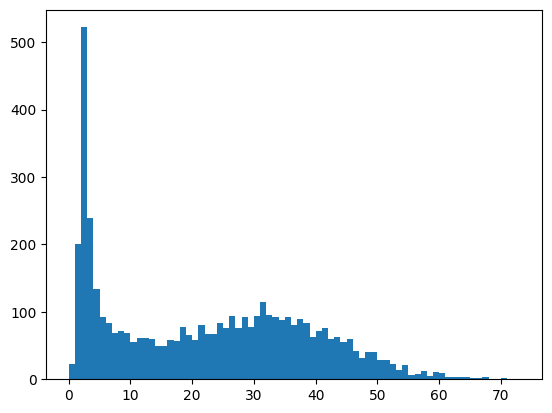

In [ ]:
plt.hist( y_vald_pred.astype(int), bins=range(0, y_vald_pred.astype(int).max(),1))
plt.show()

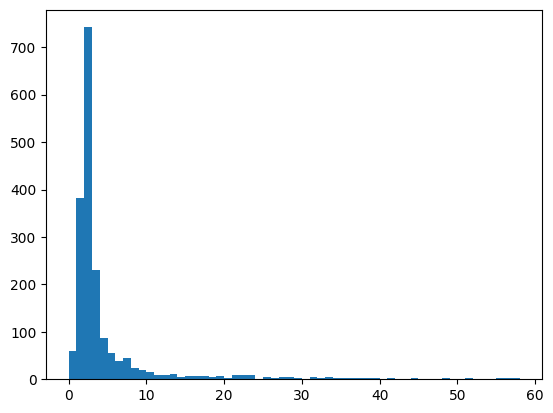

In [ ]:
plt.hist( y_test_pred.astype(int), bins=range(0, y_test_pred.astype(int).max(),1))
plt.show()

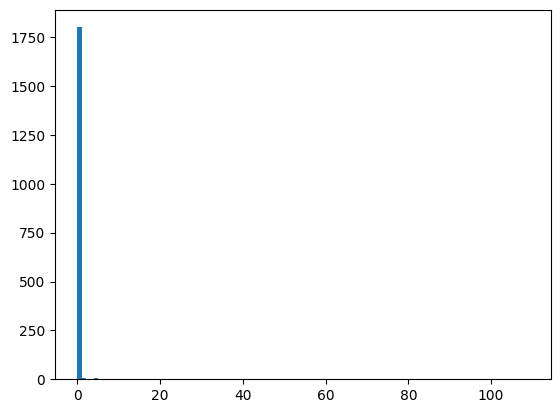

In [ ]:
plt.hist( y_test.po.astype(int), bins=range(0, y_test.po.astype(int).max(),1))
plt.show()

Al comparar con los valores reales contra los predichos, se desearía que estos formaran una diagonal, a mayor discrepancia, mayor es el valor de las diferentes métricas de desempeño.

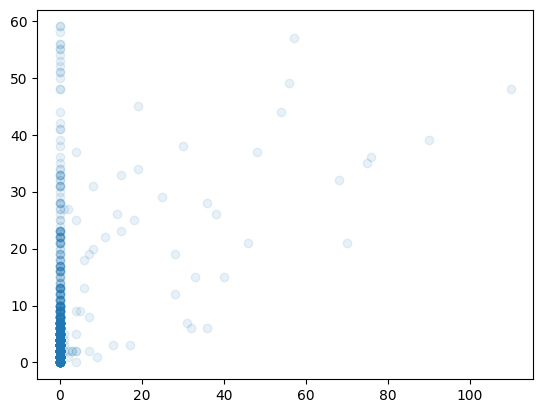

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.1)
plt.show()

Cabe notar de nuevo que luego de tomar una muestra aleatoria del conjunto de datos inicial para calcular las métricas de desempeño, el número de unidades de observación con población cero (0) seguirá siendo alto en comparación con las que sí tienen población. Si se calculasen las métricas de desempeño con solo las unidades de población se observa que el R cuadrado es mucho mejor. Esto sugiere que previo a realizar regresión, es más adecuado realizar una previa clasificación de unidades sin población.

In [ ]:
print( (y_test.po > 0).sum() )

57


In [ ]:
print( (y_test.po == 0).sum() )

1800


Se despliegan los valores calculados descartando las unidades con población observada igual a cero (0).

In [ ]:
mod_r2_test = r2_score(y_test.po[y_test.po>0], y_test_pred[y_test.po>0])
print(f"Modified test R-squared: {mod_r2_test:.4f}")

In [ ]:
mod_mse_test = mean_squared_error(y_test[y_test.po>0], y_test_pred[y_test.po>0])
print(f"Modified test mean squared error: {mod_mse_test:.4f}")

Modified test mean squared error: 419.1579


In [ ]:
mod_mae_test = mean_absolute_error(y_test[y_test.po>0], y_test_pred[y_test.po>0])
print(f"Modified test mean absolute error: {mod_mae_test:.4f}")

Modified test mean absolute error: 14.8772
